# Assignment 5
## Evolutionary Computation


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import random
import string
import time

### Exercise 5.1

In [2]:
f_1 = lambda x: abs(x)
f_2 = lambda x: x**2
f_3 = lambda x: 2 * x**2
f_4 = lambda x: x**2 + 20

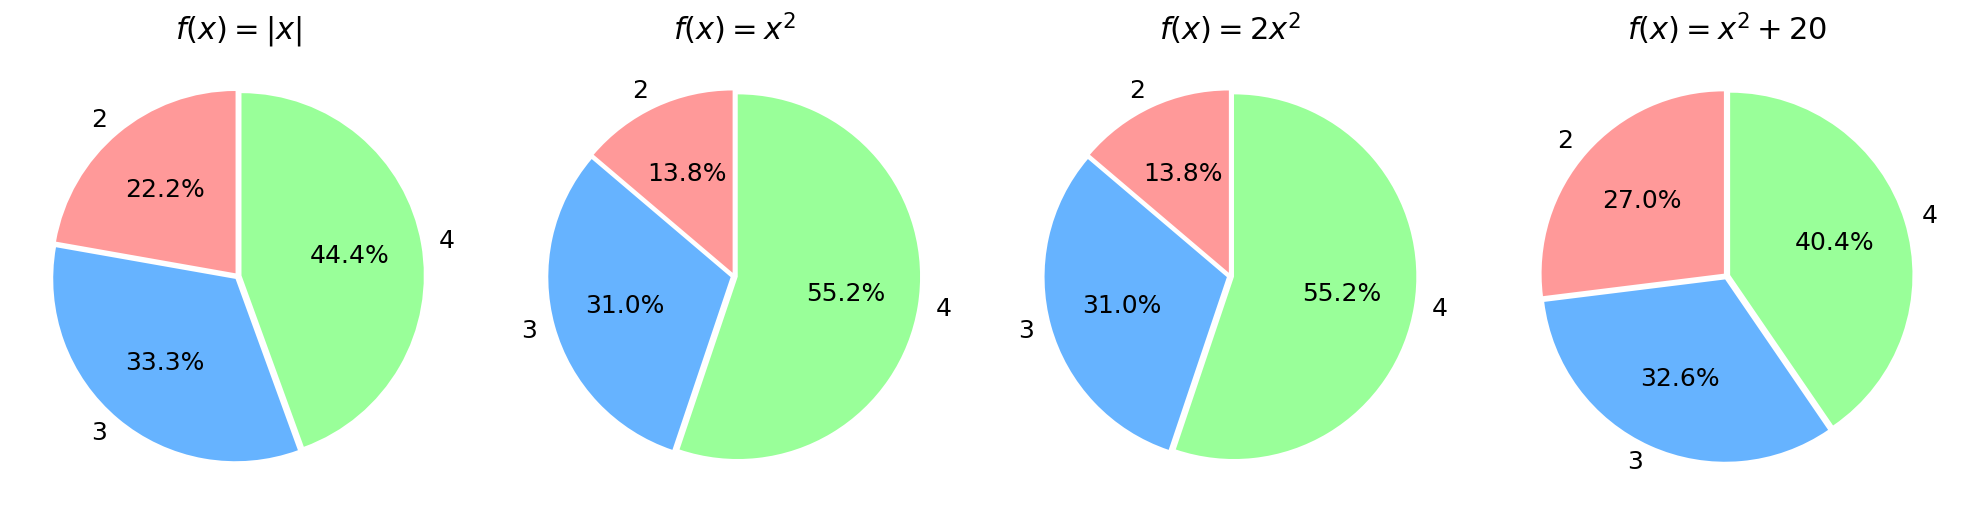

In [3]:
# Define the fitness functions
f_1 = lambda x: abs(x)
f_2 = lambda x: x**2
f_3 = lambda x: 2 * x**2
f_4 = lambda x: x**2 + 20

# Define individuals
individuals = [2, 3, 4]

# Calculate fitness values for each function and individual
fitness_values = {
    '$f(x)=|x|$': [f_1(x) for x in individuals],
    '$f(x)=x^2$': [f_2(x) for x in individuals],
    '$f(x)=2x^2$': [f_3(x) for x in individuals],
    '$f(x)=x^2 + 20$': [f_4(x) for x in individuals]
}

# Calculate probabilities for each fitness function and individual
probabilities = {}
for func_name, values in fitness_values.items():
    total_fitness = sum(values)
    probabilities[func_name] = [value / total_fitness for value in values]

# Plot pie charts for each fitness function
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = (0.02, 0.02, 0.02)

for i, (func_name, probs) in enumerate(probabilities.items()):
    ax = axs[i]
    ax.pie(probs, labels=individuals, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, textprops={'fontsize': 18})
    ax.set_title(func_name, fontsize=22)

plt.tight_layout()
plt.show()


In [4]:

df = pd.DataFrame({
    'Fitness Function (f_x)': [func_name for func_name in fitness_values.keys() for _ in individuals],
    'Individual': individuals * len(fitness_values),
    'Fitness Value': [value for values in fitness_values.values() for value in values],
    'Selection Probability': [prob for probs in probabilities.values() for prob in probs]
})

display(df)

,Fitness Function (f_x),Individual,Fitness Value,Selection Probability
0,$f(x)=|x|$,2,2,0.222222
1,$f(x)=|x|$,3,3,0.333333
2,$f(x)=|x|$,4,4,0.444444
3,$f(x)=x^2$,2,4,0.137931
4,$f(x)=x^2$,3,9,0.310345
5,$f(x)=x^2$,4,16,0.551724
6,$f(x)=2x^2$,2,8,0.137931
7,$f(x)=2x^2$,3,18,0.310345
8,$f(x)=2x^2$,4,32,0.551724
9,$f(x)=x^2 + 20$,2,24,0.269663


### Exercise 5.2

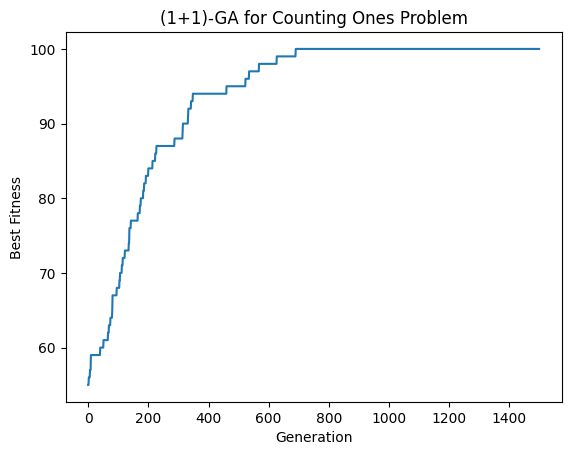

In [5]:
def generate_bit_sequence(length):
    return [random.choice([0, 1]) for _ in range(length)]

def mutate_bit_sequence(sequence, mutation_rate):
    mutated_sequence = sequence.copy()
    for i in range(len(mutated_sequence)):
        if random.random() < mutation_rate:
            mutated_sequence[i] = 1 - mutated_sequence[i]  # Flip the bit
    return mutated_sequence

def evaluate_fitness(sequence):
    return sum(sequence)

def run_genetic_algorithm(sequence_length, mutation_rate, generations):
    best_fitnesses = []

    # Step 1: Randomly generate a bit sequence x
    current_sequence = generate_bit_sequence(sequence_length)
    best_fitness = evaluate_fitness(current_sequence)
    # Step 2: Create a copy of x and invert each bit with probability |U. Let xm be the result.
    best_sequence = current_sequence.copy()

    for _ in range(generations):
        mutated_sequence = mutate_bit_sequence(best_sequence, mutation_rate)
        mutated_fitness = evaluate_fitness(mutated_sequence)

        # Step 3: If xm is closer to the goal sequence than x, replace x with xm.
        if mutated_fitness >= best_fitness:
            best_sequence = mutated_sequence.copy()
            best_fitness = mutated_fitness

        best_fitnesses.append(best_fitness)

    return best_fitnesses

sequence_length = 100
mutation_rate = 1 / sequence_length
generations = 1500

best_fitnesses = run_genetic_algorithm(sequence_length, mutation_rate, generations)

plt.plot(range(generations), best_fitnesses)
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('(1+1)-GA for Counting Ones Problem')
plt.show()


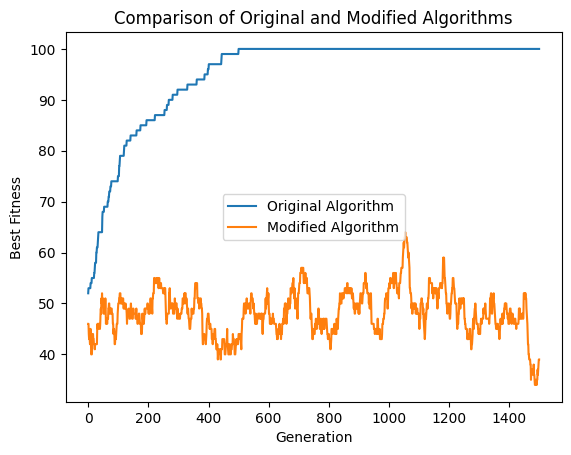

In [6]:
def run_modified_genetic_algorithm(sequence_length, mutation_rate, generations):
    best_fitnesses = []

    # Step 1: Randomly generate a bit sequence x
    current_sequence = generate_bit_sequence(sequence_length)
    best_fitness = evaluate_fitness(current_sequence)
    # Step 2: Create a copy of x and invert each bit with probability |U. Let xm be the result.
    best_sequence = current_sequence.copy()

    for _ in range(generations):
        mutated_sequence = mutate_bit_sequence(best_sequence, mutation_rate)
        mutated_fitness = evaluate_fitness(mutated_sequence)

        # Step 3: replace x with xm
        best_sequence = mutated_sequence.copy()
        best_fitness = mutated_fitness

        best_fitnesses.append(best_fitness)

    return best_fitnesses

sequence_length = 100
mutation_rate = 1 / sequence_length
generations = 1500

original_best_fitnesses = run_genetic_algorithm(sequence_length, mutation_rate, generations)
modified_best_fitnesses = run_modified_genetic_algorithm(sequence_length, mutation_rate, generations)

plt.plot(range(generations), original_best_fitnesses, label='Original Algorithm')
plt.plot(range(generations), modified_best_fitnesses, label='Modified Algorithm')
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Comparison of Original and Modified Algorithms')
plt.legend()
plt.show()


Based on the results obtained from the comparison of the original and modified versions of the genetic algorithm, we can make the following observations:

1. **Difference in Convergence Behavior**: The plots of the original and modified algorithms show differences in their convergence behavior. The original algorithm, which selects the better individual based on fitness before updating the current sequence, tends to converge towards higher fitness values more efficiently. On the other hand, the modified algorithm, which unconditionally replaces the current sequence with the mutated sequence, may exhibit slower convergence or convergence to suboptimal solutions.

2. **Stochastic Nature of Genetic Algorithms**: Genetic algorithms are inherently stochastic due to their probabilistic nature. Operations such as parent selection, mutation, and crossover introduce randomness, leading to variability in the results obtained from different runs of the algorithm.

To make a fair comparison between the original and modified versions of the algorithm, it is essential to run multiple independent experiments and analyze the statistical properties of their performance. This involves running both versions of the algorithm multiple times with different random seeds and then comparing their average performance, convergence characteristics, and statistical significance of any observed differences.

Additionally, performing statistical tests such as t-tests or ANOVA can help determine whether any observed differences in performance between the two versions are statistically significant. This approach provides more robust and reliable insights into the comparative performance of the algorithms and helps draw more conclusive conclusions regarding their differences.

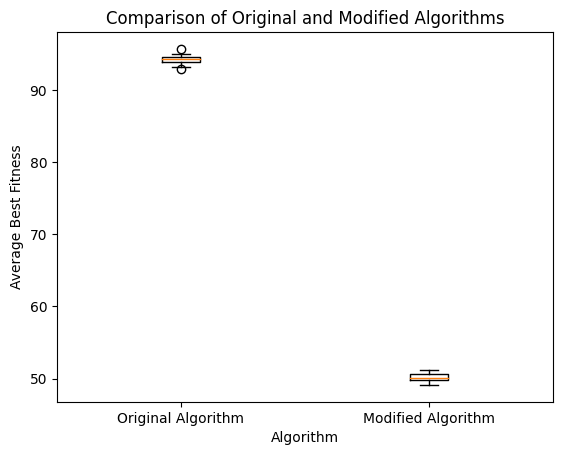

T-statistic: 130.49756135442948
P-value: 3.0266465619732176e-28


In [7]:
def run_model(model, sequence_length, mutation_rate, generations, n_runs):
    all_best_fitnesses = []
    for _ in range(n_runs):
        best_fitnesses = model(sequence_length, mutation_rate, generations)
        
        all_best_fitnesses.append(best_fitnesses)
    return np.array(all_best_fitnesses)

sequence_length = 100
mutation_rate = 1 / sequence_length
generations = 1500
runs = 10

original_results = run_model(run_genetic_algorithm, sequence_length, mutation_rate, generations, runs)
modified_results = run_model(run_modified_genetic_algorithm, sequence_length, mutation_rate, generations, runs)

# Plot box plots to compare the distributions of best fitness values
plt.boxplot([original_results.mean(axis=1), modified_results.mean(axis=1)], labels=['Original Algorithm', 'Modified Algorithm'])
plt.xlabel('Algorithm')
plt.ylabel('Average Best Fitness')
plt.title('Comparison of Original and Modified Algorithms')
plt.show()

# Perform t-test to determine if the difference is statistically significant
t_stat, p_value = stats.ttest_ind(original_results.mean(axis=1), modified_results.mean(axis=1))
print("T-statistic:", t_stat)
print("P-value:", p_value)


### Exercise 5.3

In [77]:
generate_random_string(10)

'SDTwqmeycJ'

In [93]:
def generate_random_string(length):
    return ''.join(random.choice(string.ascii_letters) for _ in range(length))

# a fitness as defined in the lecture
def calculate_fitness(target, sequence):
    return sum(1 for t, s in zip(target, sequence) if t == s)

# tournament selection with a tunable parameter K
def tournament_selection(population, target, K):
    selected_parents = []
    for _ in range(2):
        participants = random.sample(population, K)
        selected = max(participants, key=lambda x: calculate_fitness(target, x))
        selected_parents.append(selected)
    return selected_parents

def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def mutate(sequence, mutation_rate):
    mutated_sequence = ""
    for char in sequence:
        if random.random() < mutation_rate:
            mutated_sequence += random.choice(string.ascii_letters)
        else:
            mutated_sequence += char
    return mutated_sequence

def generate_initial_population(population_size, target_length):
    return [generate_random_string(target_length) for _ in range(population_size)]

def run_genetic_algorithm(target, K, mutation_rate, population_size, max_gen=100):
    population = generate_initial_population(population_size, len(target))
    generations = 0
    for _ in range(max_gen):
        new_population = []
        for _ in range(population_size // 2):
            parent1, parent2 = tournament_selection(population, target, K)
            child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1, mutation_rate)
            child2 = mutate(child2, mutation_rate)
            new_population.extend([child1, child2])
        population = new_population
        # print(population)
        generations += 1
        if target in population:
            return generations
    
    print(f'Did not find target string in {max_gen} generations')
    return -1
    

# your own target string of length L of (approximately) 15 characters
target_string = "NaturalComputing"
K = 2
# a tunable mutation rate mu,
mutation_rate = 0 # 3 / len(target_string)
# a population size N = 200
population_size = 200
num_runs = 10

total_generations = 0
for _ in range(num_runs):
    start_time = time.time()
    generations_needed = run_genetic_algorithm(target_string, K, mutation_rate, population_size, max_gen=100)
    end_time = time.time()
    total_generations += generations_needed
    if generations_needed>=0: print(f"{generations_needed} generations")
average_generations = (end_time - start_time) / num_runs
print(f"Average time to find the target: {average_generations} seconds")

# Mu = 1 / len(target_string)
# Average time to find the target: 0.028998613357543945 seconds generations

# Mu = 3 / len(target_string)
# Average time to find the target: did not find target in 100 generations

# Mu = 0
# Average time to find the target: did not find target in 100 generations

Did not find target string in 100 generations
Did not find target string in 100 generations
Did not find target string in 100 generations
Did not find target string in 100 generations
Did not find target string in 100 generations
Did not find target string in 100 generations
Did not find target string in 100 generations
Did not find target string in 100 generations
Did not find target string in 100 generations
Did not find target string in 100 generations
Average time to find the target: 0.044100165367126465 seconds


c:\Users\Maarten\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 37.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Maarten\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 39.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Maarten\AppData\Local\Temp\ipykernel_23644\1657892418.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['µ = 0', f'µ = {3 / len(target_string)}'])
c:\Users\Maarten\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 63.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  w

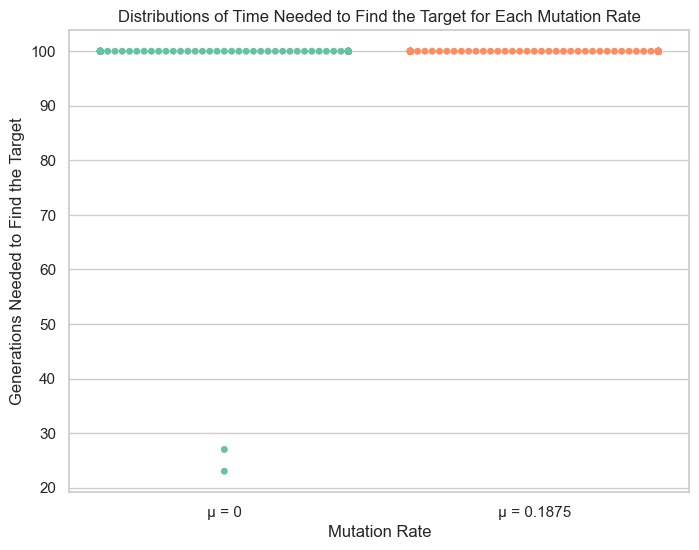

In [10]:
import random
import string
import time
import seaborn as sns
import matplotlib.pyplot as plt

def generate_random_string(length):
    return ''.join(random.choice(string.ascii_letters) for _ in range(length))

def calculate_fitness(target, sequence):
    return sum(1 for t, s in zip(target, sequence) if t == s)

def tournament_selection(population, target, K):
    selected_parents = []
    for _ in range(2):
        participants = random.sample(population, K)
        selected = max(participants, key=lambda x: calculate_fitness(target, x))
        selected_parents.append(selected)
    return selected_parents

def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def mutate(sequence, mutation_rate):
    mutated_sequence = ""
    for char in sequence:
        if random.random() < mutation_rate:
            mutated_sequence += random.choice(string.ascii_letters)
        else:
            mutated_sequence += char
    return mutated_sequence

def generate_initial_population(population_size, target_length):
    return [generate_random_string(target_length) for _ in range(population_size)]

def run_genetic_algorithm(target, K, mutation_rate, population_size, Gmax=100):
    population = generate_initial_population(population_size, len(target))
    generations = 0
    while generations < Gmax:
        new_population = []
        for _ in range(population_size // 2):
            parent1, parent2 = tournament_selection(population, target, K)
            child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1, mutation_rate)
            child2 = mutate(child2, mutation_rate)
            new_population.extend([child1, child2])
        population = new_population
        generations += 1
        if target in population:
            break
    return generations

def run_experiment(target_string, K, mutation_rate, population_size, num_runs):
    results = []
    for _ in range(num_runs):
        generations_needed = run_genetic_algorithm(target_string, K, mutation_rate, population_size)
        results.append(generations_needed)
    return results

target_string = "NaturalComputing"
K = 2
population_size = 200
num_runs = 100
Gmax = 100
mutation_rates = [0, 3 / len(target_string)]

all_results = []
for mutation_rate in mutation_rates:
    results = run_experiment(target_string, K, mutation_rate, population_size, num_runs)
    all_results.append(results)

# Visualize the distributions of tfinish for each µ using a beeswarm plot
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))
sns.swarmplot(data=all_results, palette="Set2", ax=ax)
ax.set_xlabel('Mutation Rate')
ax.set_ylabel('Generations Needed to Find the Target')
ax.set_title('Distributions of Time Needed to Find the Target for Each Mutation Rate')
ax.set_xticklabels(['µ = 0', f'µ = {3 / len(target_string)}'])
plt.show()


### Exercise 5.4

In [63]:
from numba import njit
import numpy as np
import time

0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200, 1210, 1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310, 1320, 1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420, 1430, 1440, 1450, 1460, 1470, 1480, 1490, 

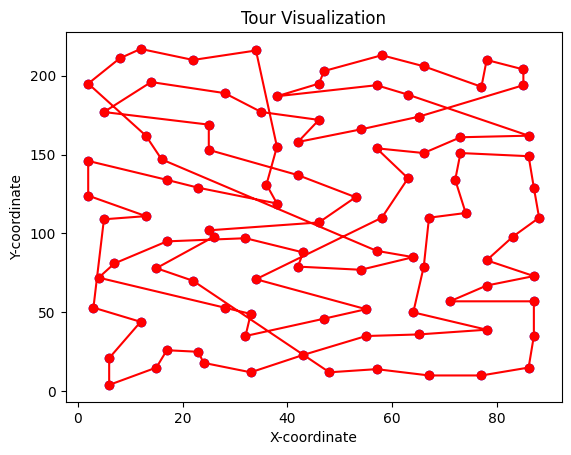

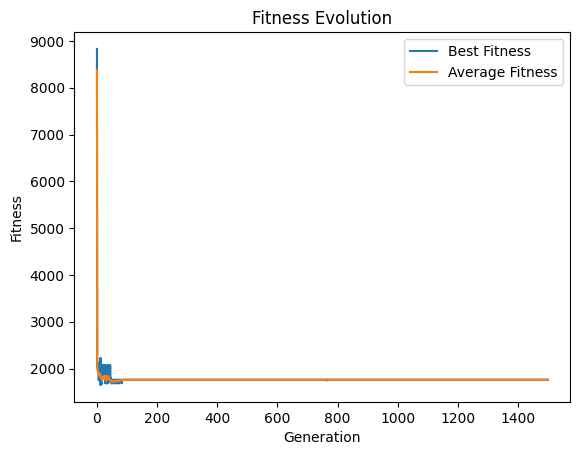

1760.3323126143039


In [122]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random 

def load_tsp(file_path):
    return np.loadtxt(file_path)

@njit
def initialize_tour(num_cities):
    return np.random.permutation(num_cities)

@njit
def distance(city1, city2, coordinates):
  x1, y1 = coordinates[city1]
  x2, y2 = coordinates[city2]
  return np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

@njit
def calculate_fitness(tour, coordinates):
  total_distance = 0
  for i in range(len(tour) - 1):
    city1, city2 = tour[i], tour[i + 1]
    total_distance += distance(city1, city2, coordinates)
  total_distance += distance(tour[-1], tour[0], coordinates)  # Back to starting city
  return total_distance

@njit
def tournament_selection(population, fitnesses):
    props = fitnesses / np.sum(fitnesses)

    # Calculate cumulative probabilities
    cumulative_probs = np.cumsum(props)

    # Perform selection
    selected_indices = np.zeros(2, dtype=np.int64)
    for i in range(2):
        r = np.random.random()
        selected_indices[i] = np.searchsorted(cumulative_probs, r)

    return population[selected_indices]

@njit
def swap_mutation(tour):
    # Select two distinct positions to swap
    pos1, pos2 = np.random.choice(len(tour), 2, replace=False)
    tour[pos1], tour[pos2] = tour[pos2], tour[pos1]
    return tour

@njit
def calculate_complement(parent, child):
    complement = []
    for city_p, city_c in zip(parent, child):
        if city_c != -1 or (city_c == -1 and city_p in child):
            complement.append(city_c)
        else:
            complement.append(city_p)
    return complement

@njit
def order_crossover(parent1, parent2):
    # 1. Choose two cut points.
    cut1 = np.random.randint(0, len(parent1) - 1)
    cut2 = np.random.randint(cut1 + 1, len(parent1))

    child1 = np.full_like(parent1, -1, dtype=np.int64)
    child2 = np.full_like(parent2, -1, dtype=np.int64)

    # 2. Keep middle piece.
    child1[cut1:cut2] = parent1[cut1:cut2]
    child2[cut1:cut2] = parent2[cut1:cut2]

    # Take complement from other parent
    complement1 = [city for city in parent2 if city not in child1[cut1:cut2]]
    complement2 = [city for city in parent1 if city not in child2[cut1:cut2]]

    j1, j2 = 0, 0
    for i in range(len(parent1)):
        new_i = (i + cut2) % len(parent1)
        if cut1 <= new_i < cut2:
            continue  # Skip the middle piece
        if child1[new_i] == -1:
            child1[new_i] = complement1[j1]
            j1 += 1
        if child2[new_i] == -1:
            child2[new_i] = complement2[j2]
            j2 += 1

    return child1, child2

@njit
def two_opt(tour, cities, max_iters=10):
    improved = True
    # iters = 0
    while improved:# and max_iters > iters:
        improved = False
        for i in range(1, len(tour) - 1):
            for j in range(i + 1, len(tour)):
                new_tour = tour.copy()
                
                new_tour[i], new_tour[j] = new_tour[j], new_tour[i]
                if calculate_fitness(new_tour, cities) < calculate_fitness(tour, cities):
                    tour = new_tour
                    improved = True
                    break
            if improved:
                break
        # iters += 1
    return tour

def plot_tour(tour, coordinates):

  x, y = zip(*coordinates[tour])
  plt.plot(list(x) + [x[0]], list(y) + [y[0]], 'o-', color='red')  # Connect cities and close the loop
  plt.scatter(x, y, color='blue')
  plt.xlabel("X-coordinate")
  plt.ylabel("Y-coordinate")
  plt.title("Tour Visualization")
  plt.show()

def plot_fitness_evolution(fitness_history):
  generations = range(len(fitness_history))
  plt.plot(generations, fitness_history[:, 0], label="Best Fitness")  # Assuming best fitness is stored at index 0
  plt.plot(generations, np.mean(fitness_history, axis=1), label="Average Fitness")
  plt.xlabel("Generation")
  plt.ylabel("Fitness")
  plt.title("Fitness Evolution")
  plt.legend()
  plt.show()


def simple_ea(city_coordinates, num_generations, population_size, use_ma=False):

    fitness_history = np.zeros((num_generations, population_size)) 

    num_cities = len(city_coordinates)

    population = np.array([initialize_tour(num_cities) for _ in range(population_size)])

    for g in range(num_generations):
        if g%10==0: print(g, end=", ")
        
        new_population = np.zeros(population.shape, dtype=int)
        fitnesses = np.array([calculate_fitness(tour, city_coordinates) for tour in population])
        fitness_history[g] = fitnesses
        for i in range(population_size // 2):
            parent1, parent2 = tournament_selection(population, fitnesses)
            child1, child2 = order_crossover(parent1, parent2)
            child1, child2 = swap_mutation(child1), swap_mutation(child2)

            
            if calculate_fitness(child1, city_coordinates) < calculate_fitness(parent1, city_coordinates):
                new_population[i*2] = child1
            else:
                new_population[i*2] = parent1
            
            if calculate_fitness(child2, city_coordinates) < calculate_fitness(parent2, city_coordinates):
                new_population[i*2 + 1] = child2
            else:
                new_population[i*2 + 1] = parent2
        
        if use_ma:
            new_population = np.array([two_opt(tour, city_coordinates) for tour in new_population], dtype=int)

        population = new_population
        
    best_tour = min(population, key=lambda x: calculate_fitness(x, city_coordinates))
    # best_tour = two_opt(best_tour, city_coordinates)
    return best_tour, calculate_fitness(best_tour, city_coordinates), np.array(fitness_history)


# city_coordinates = load_tsp('file-tsp.txt')
city_coordinates = load_tsp('rat99.tsp')[:, 1:]

# best_tour_simple_ea, distance_simple_ea, fitness_history = simple_ea(city_coordinates, num_generations=1500, population_size=50, use_ma=False)
best_tour_simple_ea, distance_simple_ea, fitness_history = simple_ea(city_coordinates, num_generations=1500, population_size=50, use_ma=True)


plot_tour(best_tour_simple_ea, city_coordinates)
plot_fitness_evolution(fitness_history)
print(distance_simple_ea)

use_ma: False
num_run: 0
0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200, 1210, 1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310, 1320, 1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420, 1430, 1440, 1450, 1460, 1470, 1480, 1490, num_run: 1
0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 3

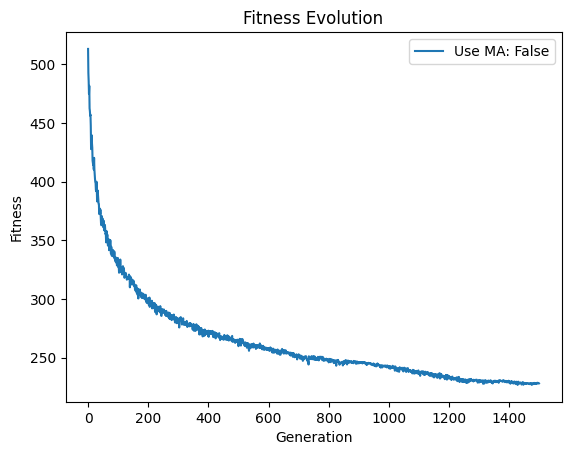

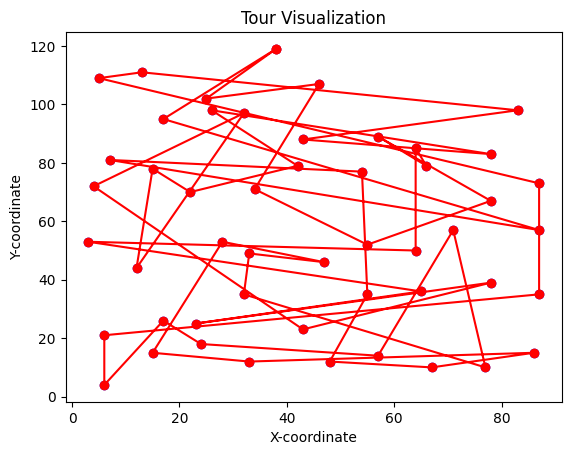

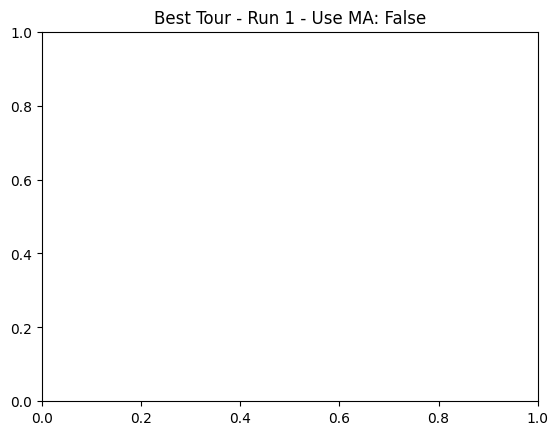

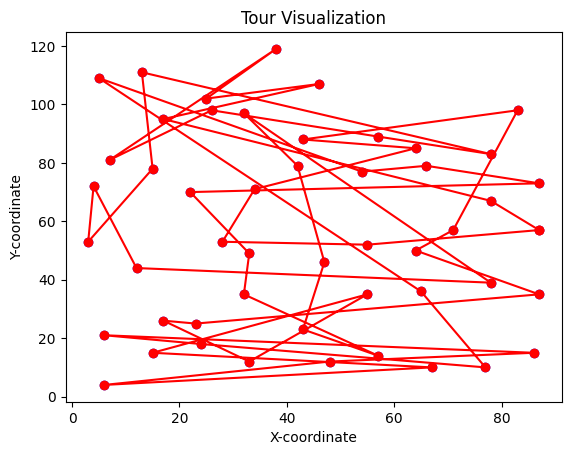

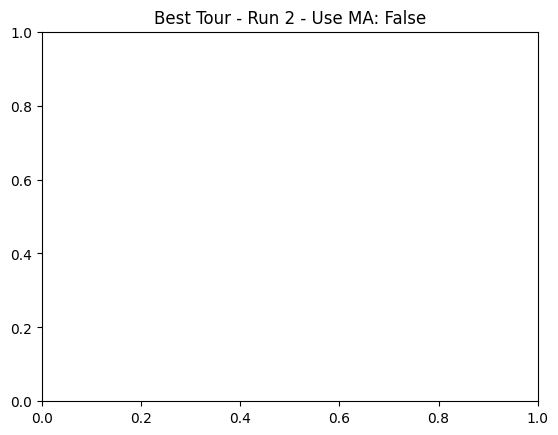

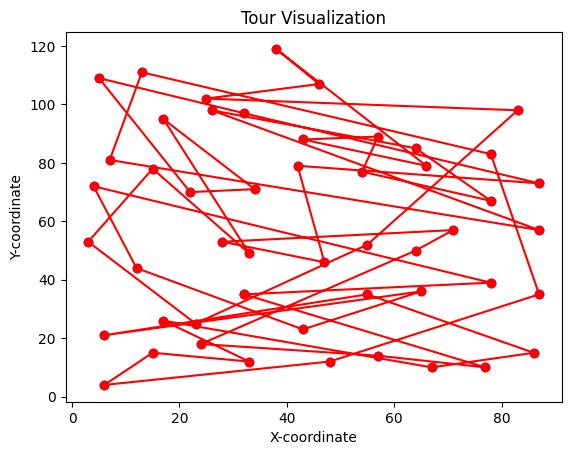

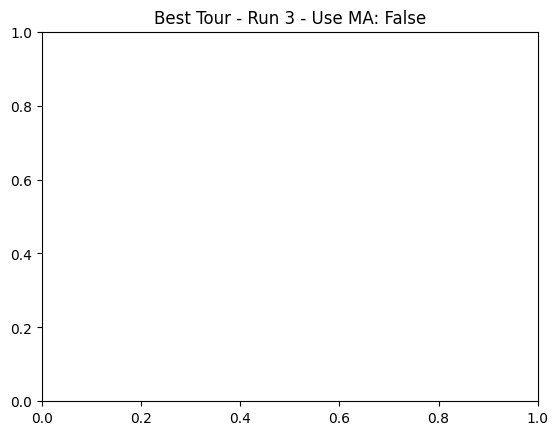

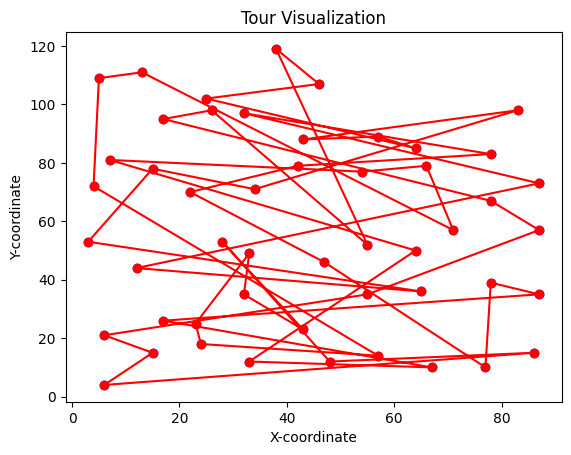

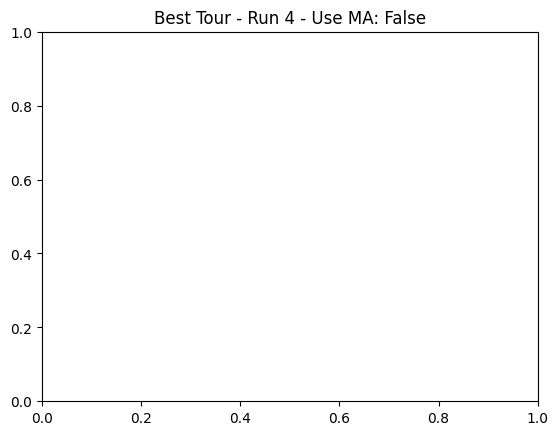

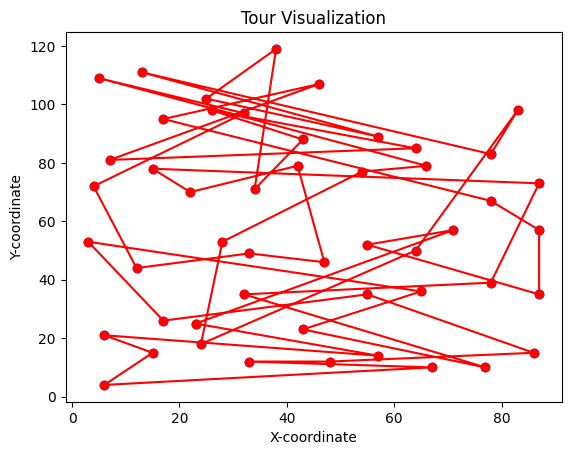

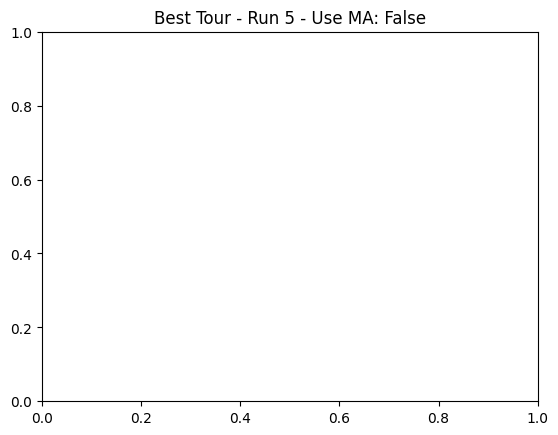

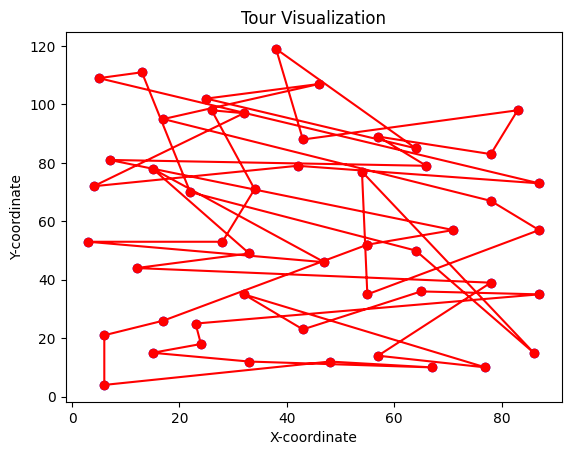

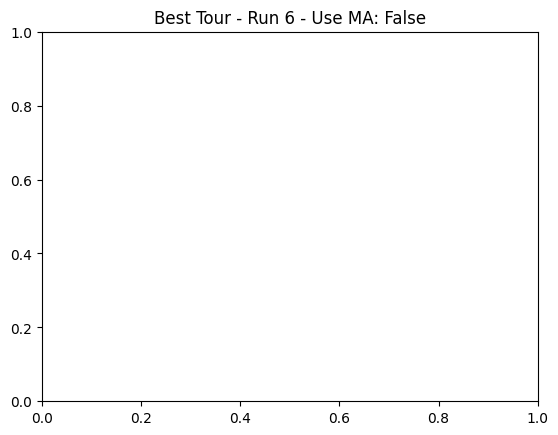

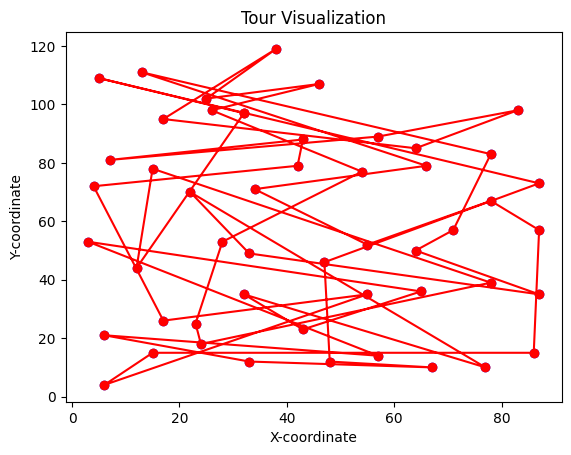

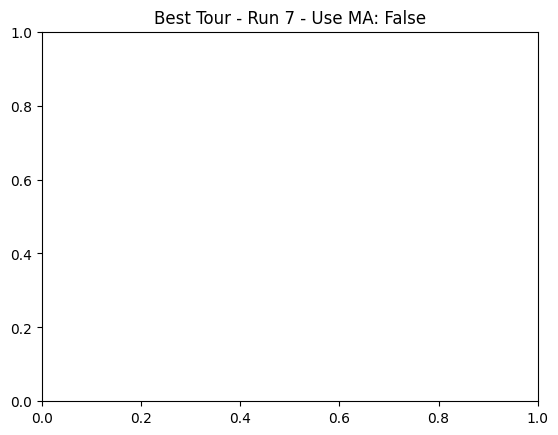

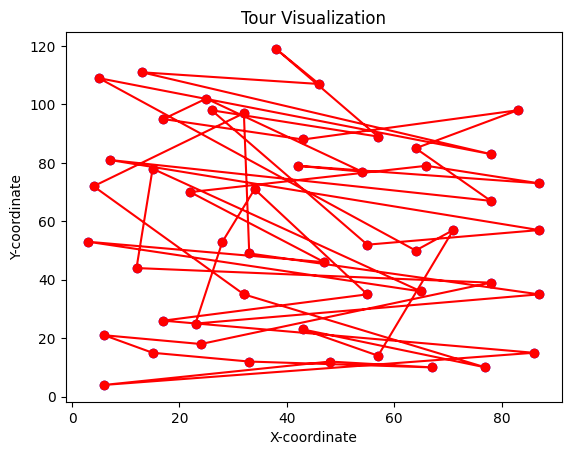

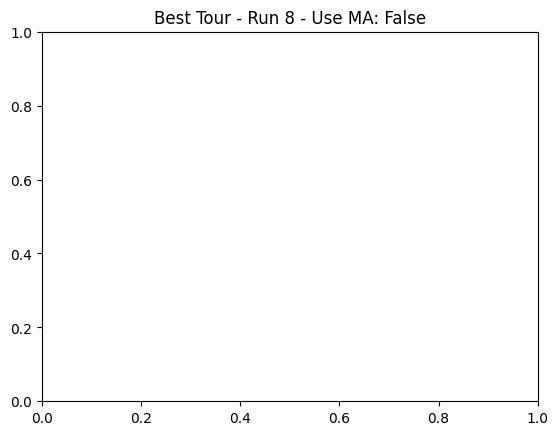

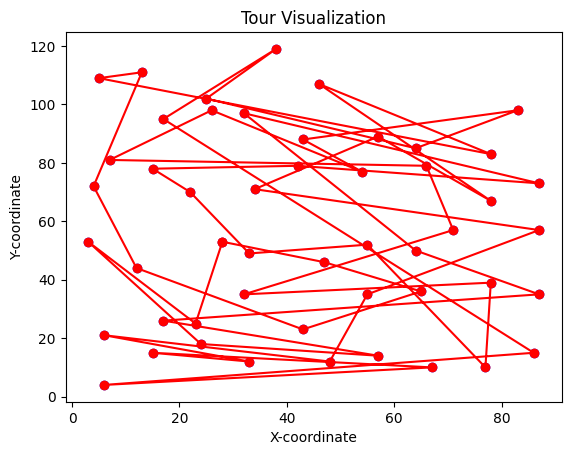

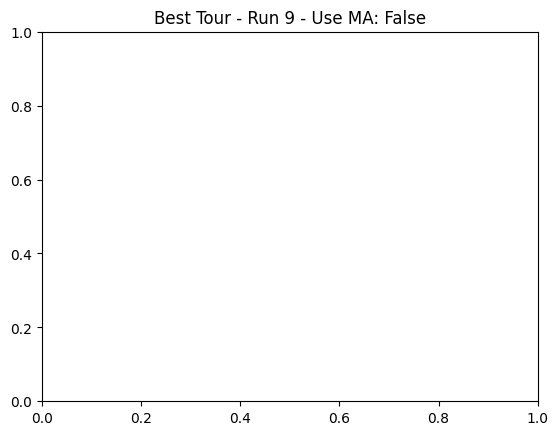

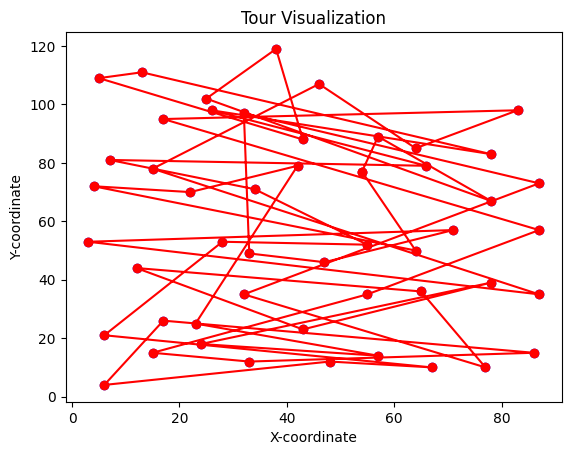

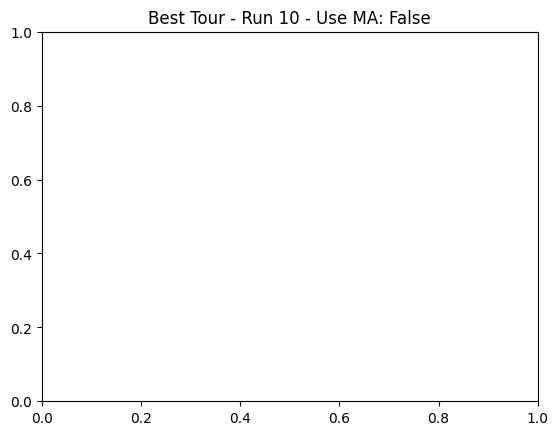

Use MA: True
Average Distance: 184.3426237037666, Std Distance: 14.493607432938028


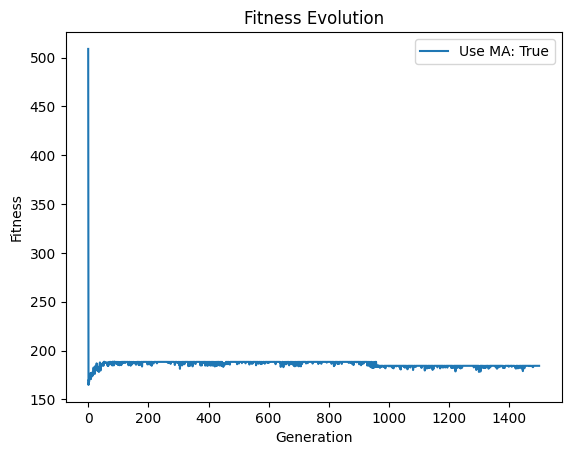

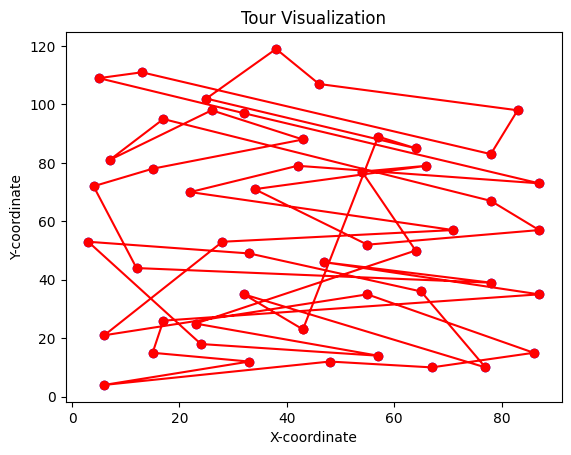

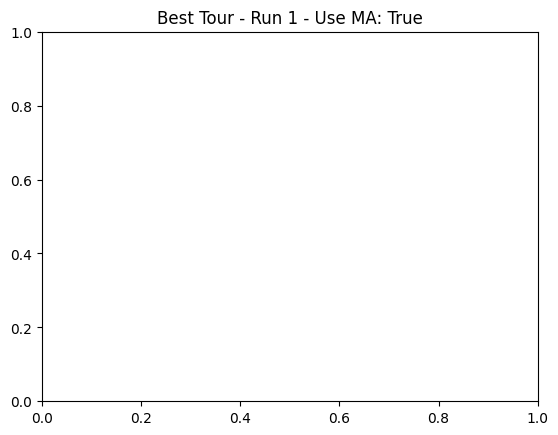

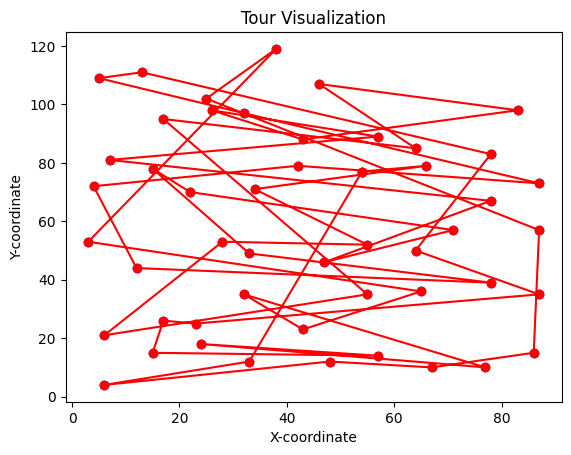

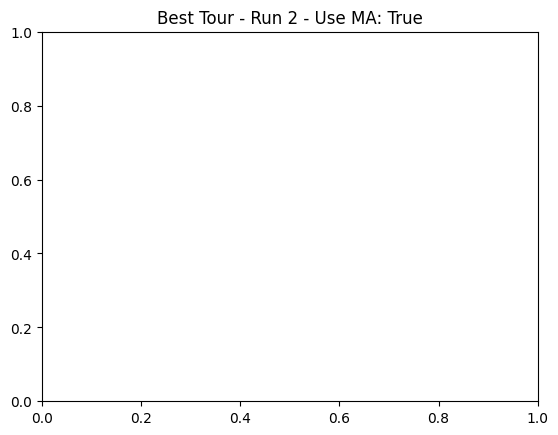

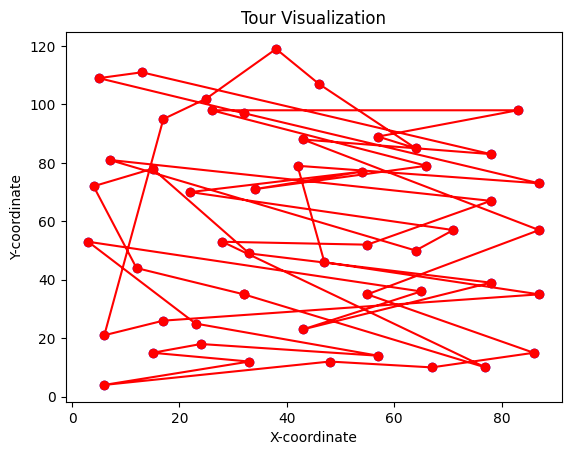

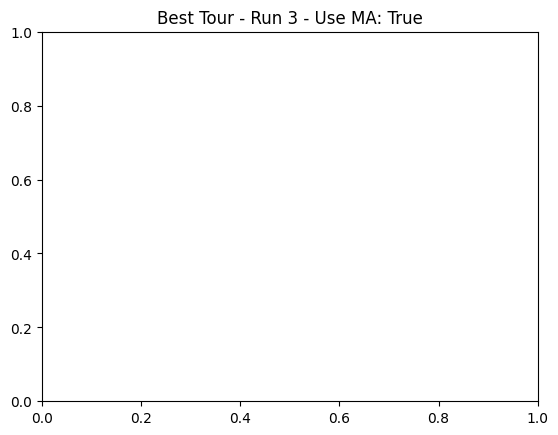

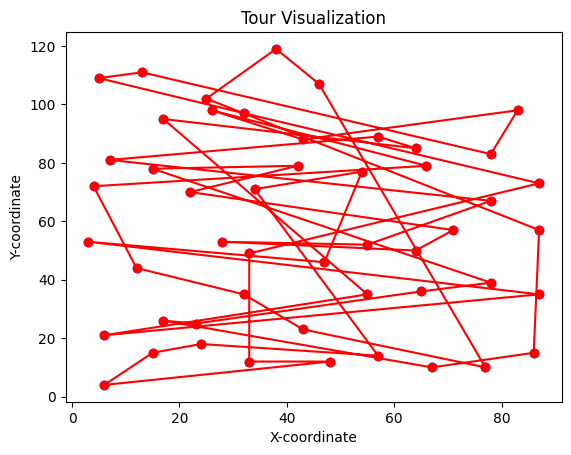

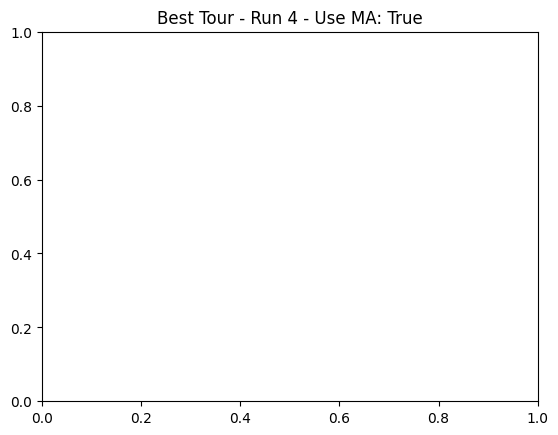

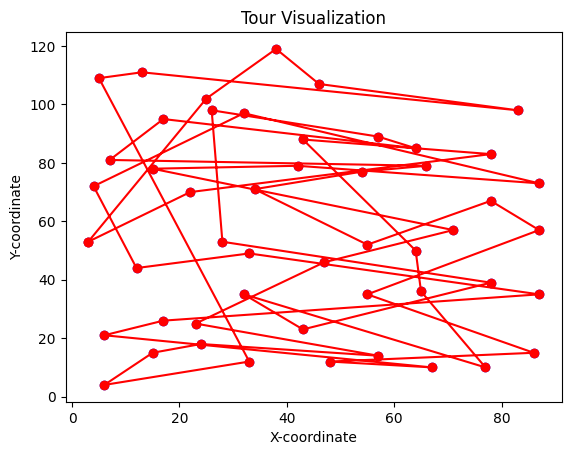

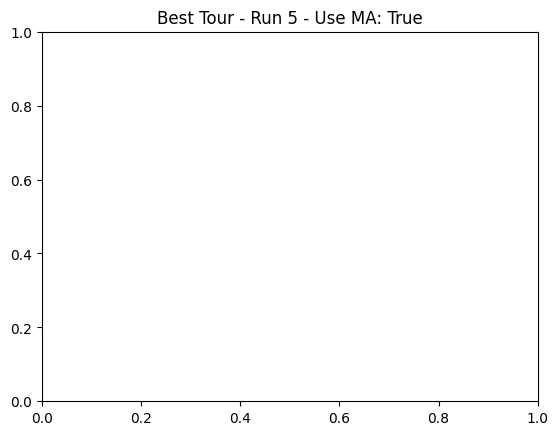

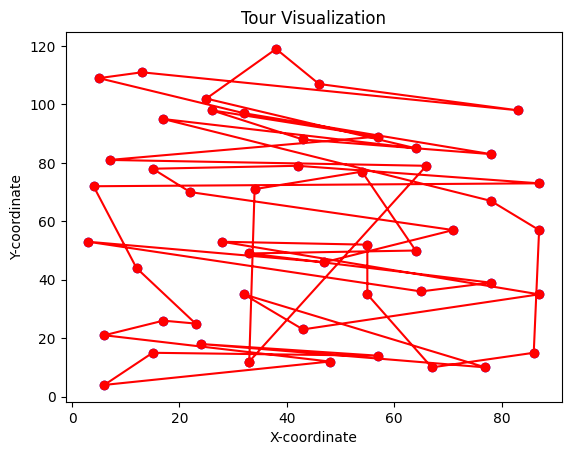

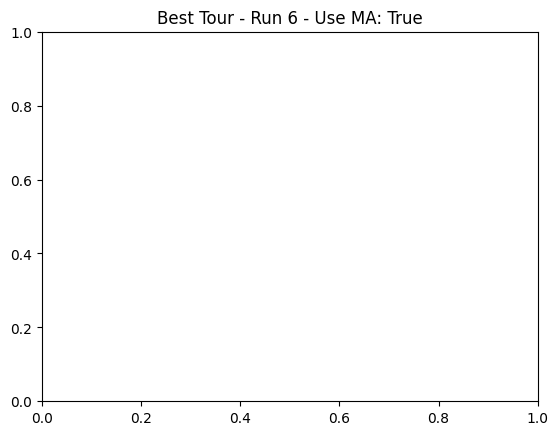

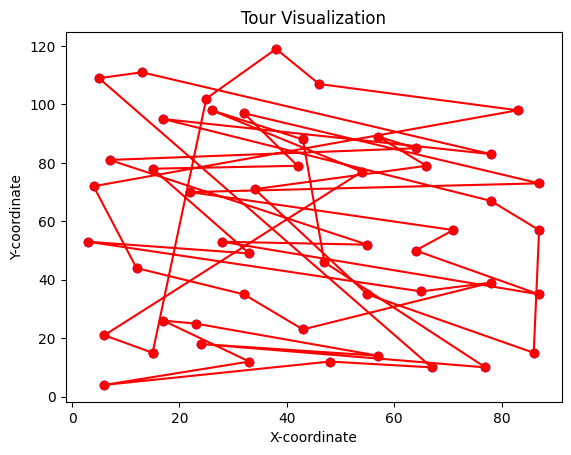

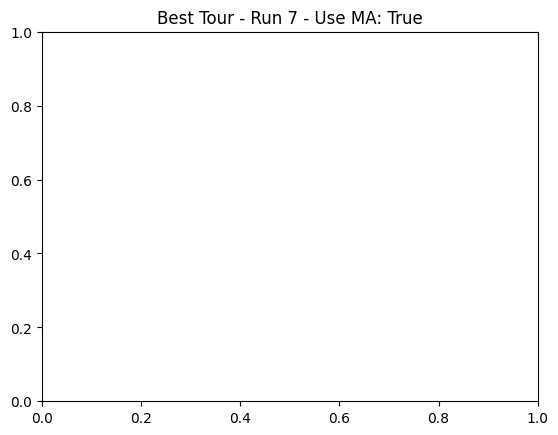

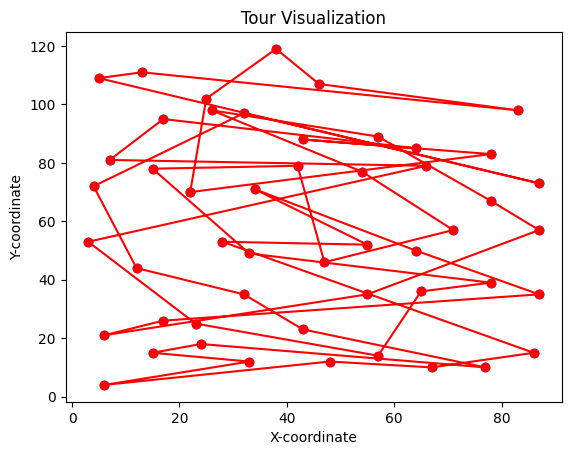

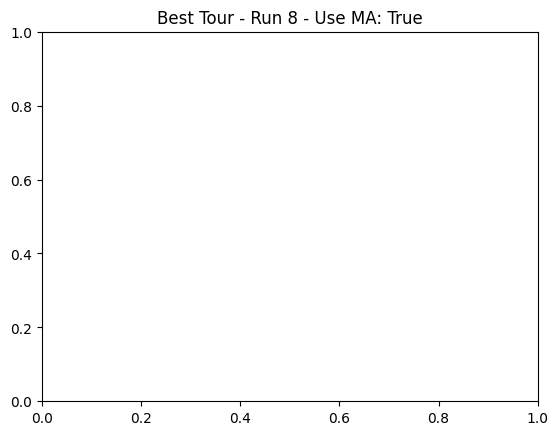

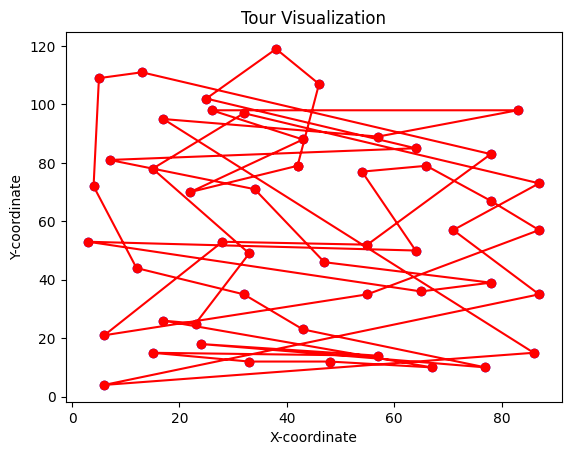

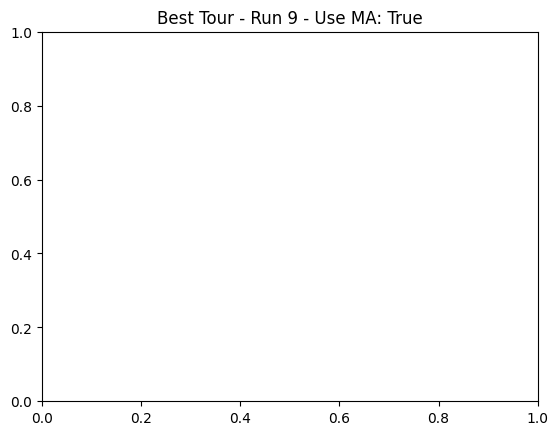

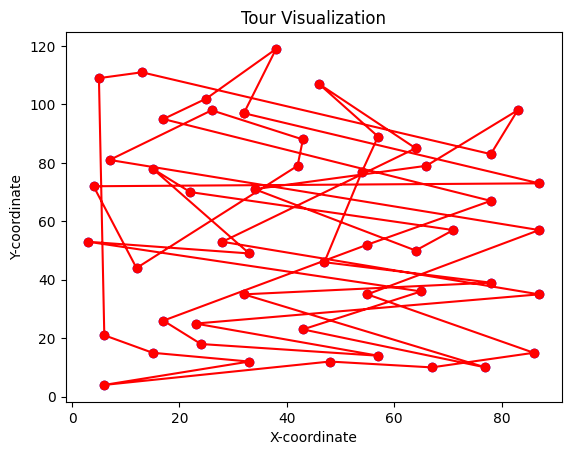

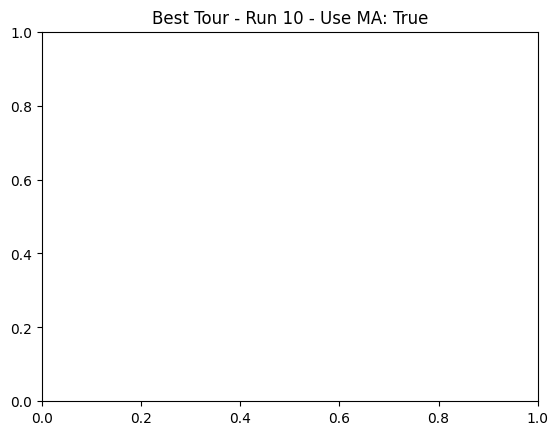

In [118]:
import numpy as np
import matplotlib.pyplot as plt

def run_experiments(city_coordinates, num_generations, population_size, num_runs):
    results = []

    for use_ma in [False, True]:
        print('use_ma:', use_ma)
        all_distances = []
        all_fitness_history = []
        all_best_tours = []

        for i in range(num_runs):
            print('num_run:', i)
            best_tour, distance, fitness_history = simple_ea(city_coordinates, num_generations, population_size, use_ma)
            all_distances.append(distance)
            all_fitness_history.append(fitness_history)
            all_best_tours.append(best_tour)

        avg_distance = np.mean(all_distances)
        std_distance = np.std(all_distances)
        avg_fitness_history = np.mean(np.array([fitness_history[:, 0] for fitness_history in all_fitness_history]), axis=0)
        
        results.append({
            'use_ma': use_ma,
            'avg_distance': avg_distance,
            'std_distance': std_distance,
            'avg_fitness_history': avg_fitness_history,
            'all_best_tours': all_best_tours
        })

    return results

def plot_experiment_results(results, data_path):
    for result in results:
        use_ma = result['use_ma']
        avg_distance = result['avg_distance']
        std_distance = result['std_distance']
        avg_fitness_history = result['avg_fitness_history']
        all_best_tours = result['all_best_tours']

        print(f'Use MA: {use_ma}')
        print(f'Average Distance: {avg_distance}, Std Distance: {std_distance}')

        # Plot fitness evolution
        plt.plot(avg_fitness_history, label=f'Use MA: {use_ma}')
        plt.xlabel("Generation")
        plt.ylabel("Fitness")
        plt.title("Fitness Evolution")
        plt.legend()
        plt.show()

        # Plot best tours
        for i, best_tour in enumerate(all_best_tours):
            plt.figure()
            plot_tour(best_tour, city_coordinates)
            plt.title(f"Best Tour - Run {i+1} - Use MA: {use_ma}")
            plt.savefig(f'figs/{data_path}/{}')
            plt.show()

def run_experiments_for_datasets(dataset_paths, num_generations, population_size, num_runs):
    all_results = []

    for dataset_path in dataset_paths:
        city_coordinates = load_tsp(dataset_path)

        results = run_experiments(city_coordinates, num_generations, population_size, num_runs)
        all_results.append((dataset_path, results))

    return all_results

def plot_experiment_results_for_datasets(all_results):
    for dataset_path, results in all_results:
        print(f'Dataset: {dataset_path}')
        plot_experiment_results(results, dataset_path)

# Example usage:
dataset_paths = ['file-tsp.txt']
num_generations = 1500
population_size = 50
num_runs = 10
all_results = run_experiments_for_datasets(dataset_paths, num_generations, population_size, num_runs)
plot_experiment_results_for_datasets(all_results)

# # Example usage:
# city_coordinates = load_tsp('file-tsp.txt')
# num_generations = 1500
# population_size = 50
# num_runs = 10
# experiment_results = run_experiments(city_coordinates, num_generations, population_size, num_runs)
# plot_experiment_results(experiment_results)


In [ ]:
if __name__ == "__main__":
  starttime_ea = time.time()
  mean_ea, best_ea = run_ex_5_4_parallel(use_ma=False)
  endtime_ea = time.time()
  mean_ma, best_ma = run_ex_5_4_parallel(use_ma=True)
  endtime_ma = time.time()

  EA_time = endtime_ea - starttime_ea
  MA_time = endtime_ma - endtime_ea
  print(f"Mean Best Fitness for EA: {mean_ea}, Best Fitness: {best_ea}, time taken: {EA_time}")
  print(
      f"Mean Best Fitness MA: {mean_ma}, Best Fitness: {best_ma}, time taken: {MA_time}"
  )
